In [41]:
import glom
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

from typing import Any, Callable, Dict, Iterable, List, OrderedDict, Tuple

In [2]:
def parse_jsonline_file(infile: str) -> List[Dict]:
    info = []
    with open(infile) as IN:
        for n, line in enumerate(IN):
            temp = line.strip()
            if not temp:
                continue
            load = glom.glom(temp, lambda x: json.loads(x))
            info.append(load)
    return info

In [3]:
log_file = "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json"

info = parse_jsonline_file(log_file)
df1 = pd.DataFrame.from_records(info)

df_train = df1[df1["status"] == "train"]
df_valid = df1[df1["status"] == "valid"]
   

In [26]:
df1

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy
0,train,0,0,0.818780,1.842990e-01,3.112373e-01,2.107951e-01,0.594523,0.874412
1,train,0,50,0.638831,2.035217e-01,3.139446e-01,2.514410e-01,0.558574,0.896727
2,train,0,100,0.525898,2.954357e-01,4.039511e-01,3.708908e-01,0.589172,0.930972
3,train,0,150,0.448034,3.498710e-01,4.513919e-01,4.398872e-01,0.596756,0.948383
4,train,0,200,0.394359,3.981238e-01,4.947663e-01,4.938090e-01,0.614252,0.957650
...,...,...,...,...,...,...,...,...,...
147,train,14,350,0.001757,8.987309e-01,9.399765e-01,9.806030e-01,0.911398,0.998965
148,valid,14,0,0.004868,6.369427e-11,6.369427e-11,6.369427e-11,1.000000,0.998503
149,valid,14,50,0.006394,7.181246e-01,7.537221e-01,7.604931e-01,0.916980,0.997365
150,train,15,0,0.003180,9.815411e-01,9.906846e-01,9.995599e-01,0.981965,0.998289


In [9]:
len(df_valid)

30

In [4]:
def myfunction(epoch, step):
#     g_s = epoch * steps_per_epoch + step
    g_s = epoch + step
    return int(g_s)

C:\Users\dulic\AppData\Local\Temp\ipykernel_14248\980538229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["total_step"] = df_train["step"]
C:\Users\dulic\AppData\Local\Temp\ipykernel_14248\980538229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["total_step"] = df_train.apply(lambda x: myfunction(x["epoch"]*396,  x['step']), axis=1)


<Axes: xlabel='total_step'>

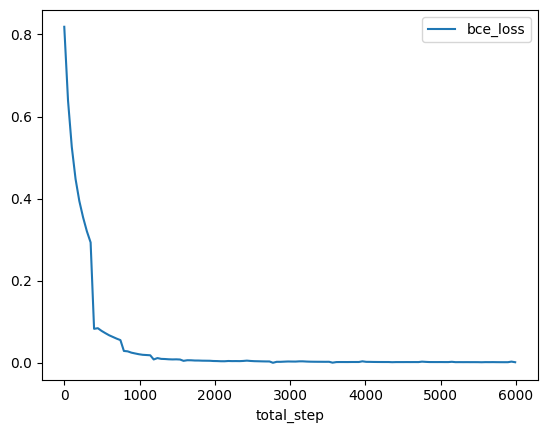

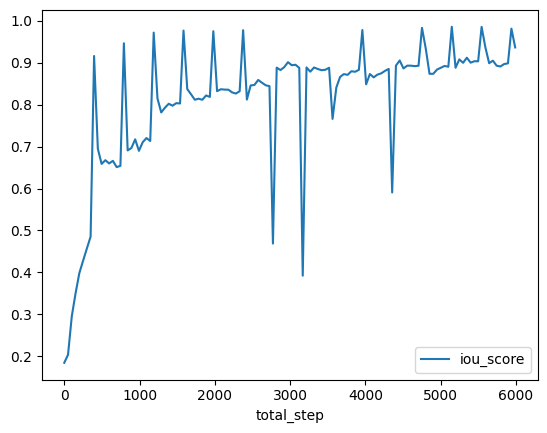

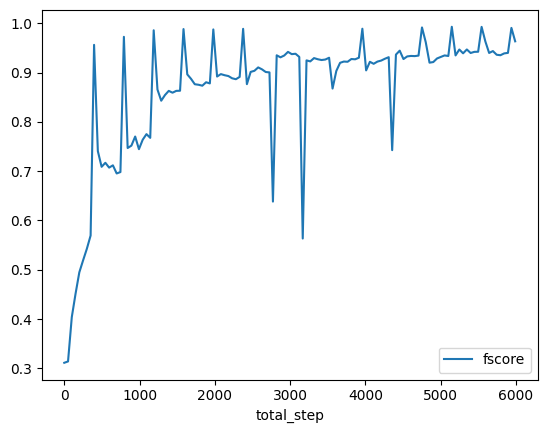

In [5]:
train_loss = df_train[["bce_loss", "step"]][:10]
tmp = df_train[["bce_loss","epoch","step"]]
# tmp = tmp.insert(2, "total_step", value=[0]*len(tmp))
df_train["total_step"] = df_train["step"]

epoch_step = 350
df_train["total_step"] = df_train.apply(lambda x: myfunction(x["epoch"]*396,  x['step']), axis=1)
df_train.plot(kind="line", x="total_step", y="bce_loss")
df_train.plot(kind="line", x="total_step", y="iou_score")
df_train.plot(kind="line", x="total_step", y="fscore")
# tmp

In [5]:
def plot_cumulative_returns(dataframe: pd.DataFrame):   
#     line_plot = Line(init_opts=opts.InitOpts(width="1400px", height="800px"))
#     line_plot.add_xaxis(xaxis_data=dataframe.index.strftime("%Y-%m-%d").values.tolist())
    for col_name in ["bce_loss", "fscore"]: # 循环绘制dataframe的曲线
        dataframe.plot.line(x="total_step")

In [48]:
log_file1 = "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315.json"
info1 = parse_jsonline_file(log_file1)
df2 = pd.DataFrame.from_records(info1)

df_train1 = df2[df2["status"] == "train"]
df_train1 = df_train1[df_train1["step"] % 50 == 0]
df_train1["total_step"] = df_train1["step"]
df_train1["total_step"] = df_train1.apply(lambda x: myfunction(x["epoch"]*396,  x['step']), axis=1)
# df_train1["total_step"]
df_train1

# plot_cumulative_returns(df_train)

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step
0,train,0,0,0.612954,0.108167,0.195218,0.332548,0.138163,0.781480,0
5,train,0,50,0.369715,0.595695,0.712048,0.730084,0.713568,0.930363,50
10,train,0,100,0.280676,0.742258,0.825042,0.838363,0.825627,0.958317,100
15,train,0,150,0.235285,0.792608,0.859975,0.871500,0.867941,0.968514,150
20,train,0,200,0.204130,0.822852,0.881346,0.892589,0.890047,0.974256,200
...,...,...,...,...,...,...,...,...,...,...
2939,train,28,150,0.001314,0.994081,0.996997,0.997667,0.996350,0.999439,11238
2944,train,28,200,0.001313,0.994389,0.997160,0.997875,0.996464,0.999436,11288
2949,train,28,250,0.001304,0.994477,0.997209,0.997973,0.996461,0.999440,11338
2954,train,28,300,0.001303,0.994511,0.997230,0.998002,0.996471,0.999441,11388


In [50]:
# df_train11 = df_train1[df_train1["step"] % 50 == 0]
# df_train11

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\2975798065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine["fs_0"] = df_train1.reset_index()["fscore"][:len(df_train)]


<Axes: xlabel='total_step'>

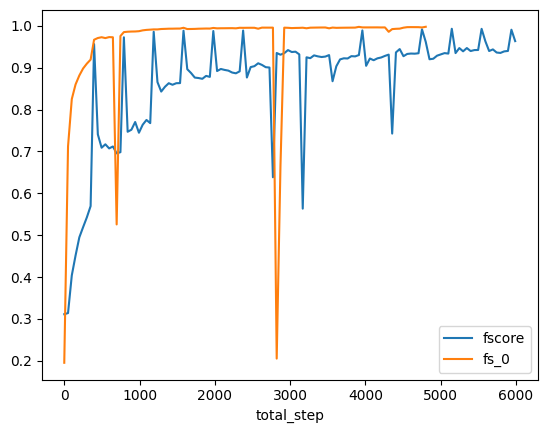

In [67]:
combine = df_train[["total_step", "fscore"]]
combine["fs_0"] = df_train1.reset_index()["fscore"][:len(df_train)]
combine.plot(x="total_step")

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\3417754895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combine["accuracy_1"] = df_train1.reset_index()["recall"][:len(df_train)]


<Axes: xlabel='total_step'>

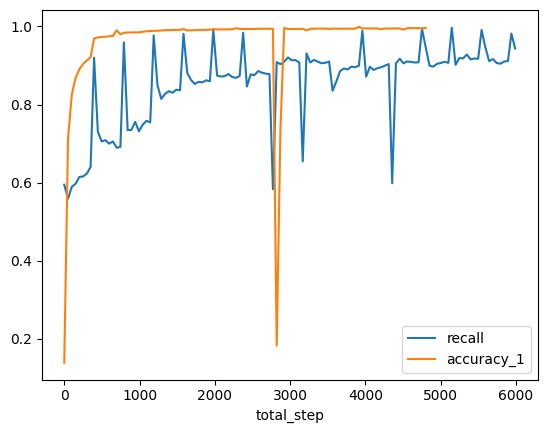

In [71]:
combine = df_train[["total_step", "recall"]]
combine["accuracy_1"] = df_train1.reset_index()["recall"][:len(df_train)]
combine.plot(x="total_step")


In [59]:
 df_train1

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step
0,train,0,0,0.612954,0.108167,0.195218,0.332548,0.138163,0.781480,0
5,train,0,50,0.369715,0.595695,0.712048,0.730084,0.713568,0.930363,50
10,train,0,100,0.280676,0.742258,0.825042,0.838363,0.825627,0.958317,100
15,train,0,150,0.235285,0.792608,0.859975,0.871500,0.867941,0.968514,150
20,train,0,200,0.204130,0.822852,0.881346,0.892589,0.890047,0.974256,200
...,...,...,...,...,...,...,...,...,...,...
2939,train,28,150,0.001314,0.994081,0.996997,0.997667,0.996350,0.999439,11238
2944,train,28,200,0.001313,0.994389,0.997160,0.997875,0.996464,0.999436,11288
2949,train,28,250,0.001304,0.994477,0.997209,0.997973,0.996461,0.999440,11338
2954,train,28,300,0.001303,0.994511,0.997230,0.998002,0.996471,0.999441,11388


In [66]:
df_train1.reset_index()

,index,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step
0,0,train,0,0,0.612954,0.108167,0.195218,0.332548,0.138163,0.781480,0
1,5,train,0,50,0.369715,0.595695,0.712048,0.730084,0.713568,0.930363,50
2,10,train,0,100,0.280676,0.742258,0.825042,0.838363,0.825627,0.958317,100
3,15,train,0,150,0.235285,0.792608,0.859975,0.871500,0.867941,0.968514,150
4,20,train,0,200,0.204130,0.822852,0.881346,0.892589,0.890047,0.974256,200
...,...,...,...,...,...,...,...,...,...,...,...
492,2939,train,28,150,0.001314,0.994081,0.996997,0.997667,0.996350,0.999439,11238
493,2944,train,28,200,0.001313,0.994389,0.997160,0.997875,0.996464,0.999436,11288
494,2949,train,28,250,0.001304,0.994477,0.997209,0.997973,0.996461,0.999440,11338
495,2954,train,28,300,0.001303,0.994511,0.997230,0.998002,0.996471,0.999441,11388


In [10]:
import seaborn as sns
import pandas as pd
import numpy as np

<Axes: >

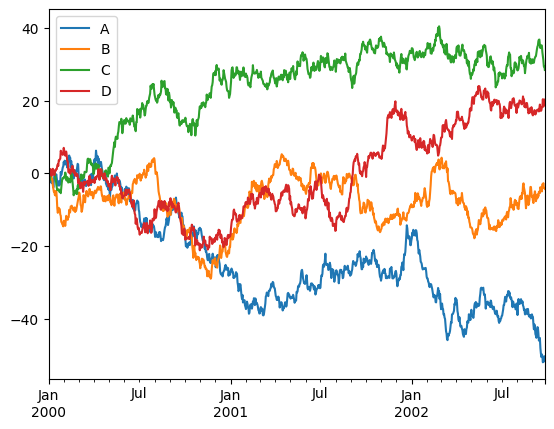

In [19]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df.plot()

# df = df.cumsum()

# plt.figure();
# df.plot();

# df_train

In [6]:
def mean_of_epoch(df_src):
    epochs = df_src["epoch"].unique()
    
    columns=df_src.columns
    df_dst = pd.DataFrame(columns=columns)
    for epoch in epochs:
        df_dst.loc[epoch] = df_src[df_src["epoch"] == epoch].mean(numeric_only=True)
    
    return df_dst
    

# 第一个文件

<Axes: xlabel='epoch'>

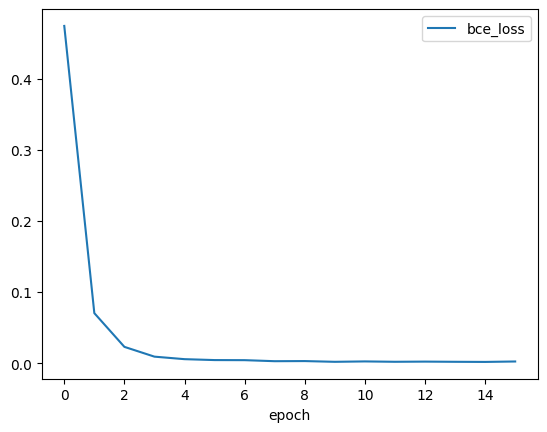

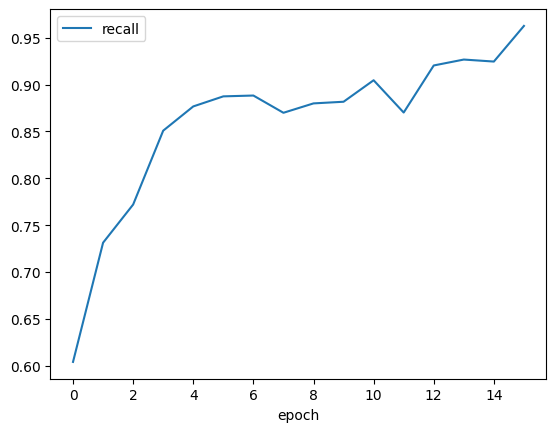

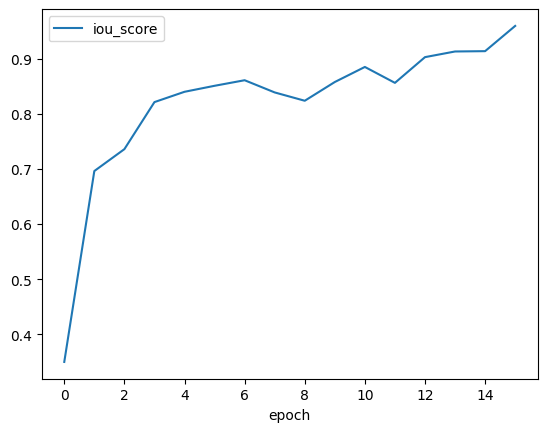

In [104]:
df_train_dst = mean_of_epoch(df_train)
df_train_dst.plot.line(x="epoch", y="bce_loss")
df_train_dst.plot.line(x="epoch", y="recall")
df_train_dst.plot.line(x="epoch", y="iou_score")

In [185]:
df_train_dst1 = mean_of_epoch(df_train1)
# df_train_dst1.plot.line(x="epoch", y="bce_loss")
# df_train_dst1.plot.line(x="epoch", y="recall")
# df_train_dst1.plot.line(x="epoch", y="iou_score")

In [186]:
plt.figure()
# df_train_dst.plot.line(x="epoch", y="bce_loss")
# df_train_dst1.plot.line(x="epoch", y="bce_loss")

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [93]:
df_train[df_train["epoch"]==0]

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step
0,train,0,0,0.818780,0.184299,0.311237,0.210795,0.594523,0.874412,0
1,train,0,50,0.638831,0.203522,0.313945,0.251441,0.558574,0.896727,50
2,train,0,100,0.525898,0.295436,0.403951,0.370891,0.589172,0.930972,100
3,train,0,150,0.448034,0.349871,0.451392,0.439887,0.596756,0.948383,150
4,train,0,200,0.394359,0.398124,0.494766,0.493809,0.614252,0.957650,200
5,train,0,250,0.354551,0.427809,0.519013,0.524175,0.615719,0.963788,250
6,train,0,300,0.320821,0.456834,0.542534,0.551439,0.622797,0.968608,300
7,train,0,350,0.293486,0.485357,0.569419,0.580135,0.640441,0.971833,350


In [170]:
df8 = df_train_dst
df9 = df_train_dst1
df8.loc[:, "key"] = 'trail1'
df9.loc[:, "key"] = 'trail2'
df8

,status,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy,total_step,key
0,NaN,0.0,175.0,0.474345,0.350156,0.450782,0.427822,0.604029,0.939047,175.0,trail1
1,NaN,1.0,175.0,0.070414,0.696119,0.741915,0.765575,0.731286,0.995129,571.0,trail1
2,NaN,2.0,175.0,0.022997,0.735777,0.786593,0.857347,0.772023,0.996328,967.0,trail1
3,NaN,3.0,175.0,0.009222,0.821061,0.874631,0.930418,0.850878,0.997497,1363.0,trail1
4,NaN,4.0,175.0,0.005692,0.839728,0.894428,0.938359,0.876752,0.997906,1759.0,trail1
5,NaN,5.0,175.0,0.004404,0.850598,0.903791,0.944185,0.887497,0.998192,2155.0,trail1
6,NaN,6.0,175.0,0.004279,0.860684,0.911118,0.953073,0.888376,0.998224,2551.0,trail1
7,NaN,7.0,175.0,0.002833,0.838567,0.898544,0.937481,0.869973,0.998637,2947.0,trail1
8,NaN,8.0,175.0,0.002999,0.823495,0.881174,0.901516,0.879986,0.998602,3343.0,trail1
9,NaN,9.0,175.0,0.001963,0.857459,0.914978,0.962138,0.881750,0.998922,3739.0,trail1


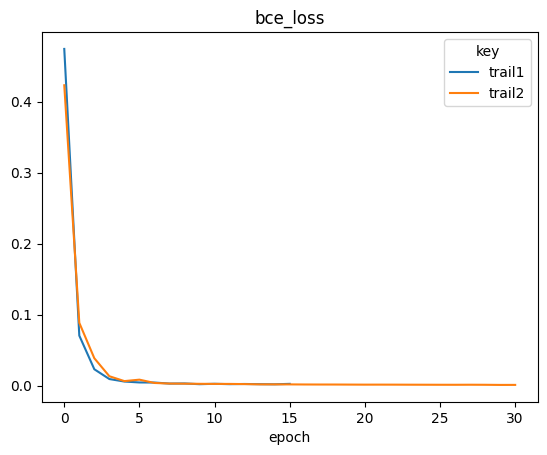

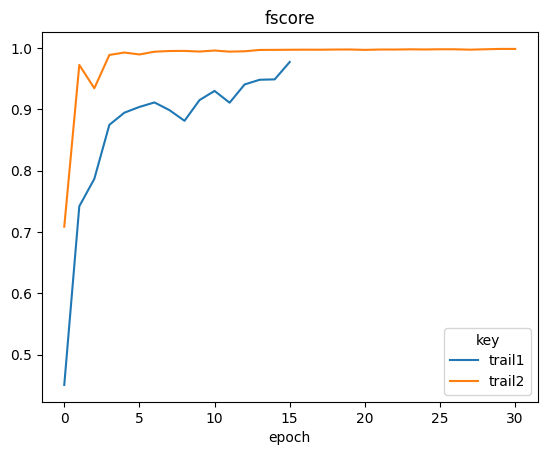

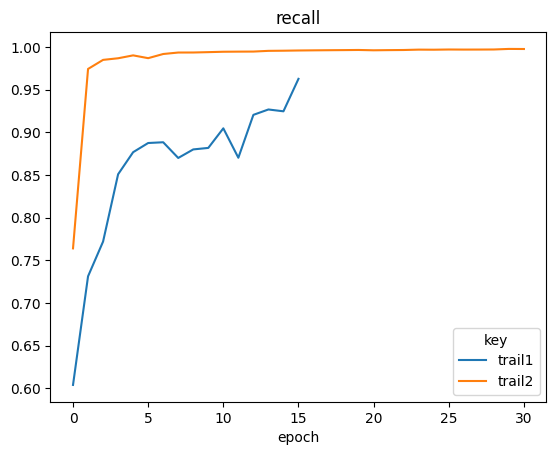

In [176]:
DFGroup = DF.groupby(['epoch','key'])

for metric in ["bce_loss", "fscore", "recall"]: #, "fscore", "recall", "precision", "accuracy"]:
    DFGPlot = DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)

In [175]:
 DFGroup.sum().unstack('key')
# DFGroup.sum().unstack('key')
# for x,y in DFGroup:
#     print(y)
# DF

status          step              bce_loss           iou_score  \
key   trail1 trail2 trail1      trail2    trail1    trail2    trail1   
epoch                                                                  
0.0      0.0    0.0  175.0  158.333333  0.474345  0.423154  0.350156   
1.0      0.0    0.0  175.0  175.000000  0.070414  0.088422  0.696119   
2.0      0.0    0.0  175.0  175.000000  0.022997  0.038525  0.735777   
3.0      0.0    0.0  175.0  175.000000  0.009222  0.013160  0.821061   
4.0      0.0    0.0  175.0  175.000000  0.005692  0.006305  0.839728   
5.0      0.0    0.0  175.0  175.000000  0.004404  0.008342  0.850598   
6.0      0.0    0.0  175.0  175.000000  0.004279  0.003683  0.860684   
7.0      0.0    0.0  175.0  175.000000  0.002833  0.002852  0.838567   
8.0      0.0    0.0  175.0  167.391304  0.002999  0.002688  0.823495   
9.0      0.0    0.0  175.0  175.000000  0.001963  0.002476  0.857459   
10.0     0.0    0.0  175.0  175.000000  0.002519  0.002358  0.884751   
11.0     0.0    0.0  175.0  175.000000  0.002004  0.002337  0.855927   
12.0     0.0    0.0  175.0  175.000000  0.002252  0.002100  0.902535   
13.0     0.0    0.0  175.0  175.000000  0.001983  0.001727  0.912789   
14.0     0.0    0.0  175.0  175.000000  0.001810  0.001708  0.913378   
15.0     0.0    0.0   25.0  175.000000  0.002426  0.001669  0.959112   
16.0     NaN    0.0    NaN  175.000000       NaN  0.001551       NaN   
17.0     NaN    0.0    NaN  175.000000       NaN  0.001490       NaN   
18.0     NaN    0.0    NaN  175.000000       NaN  0.001478       NaN   
19.0     NaN    0.0    NaN  175.000000       NaN  0.001391       NaN   
20.0     NaN    0.0    NaN  175.000000       NaN  0.001316       NaN   
21.0     NaN    0.0    NaN  175.000000       NaN  0.001342       NaN   
22.0     NaN    0.0    NaN  175.000000       NaN  0.001306       NaN   
23.0     NaN    0.0    NaN  175.000000       NaN  0.001239       NaN   
24.0     NaN    0.0    NaN  175.000000       NaN  0.001195       NaN   
25.0     NaN    0.0    NaN  175.000000       NaN  0.001143       NaN   
26.0     NaN    0.0    NaN  175.000000       NaN  0.001122       NaN   
27.0     NaN    0.0    NaN  175.000000       NaN  0.001196       NaN   
28.0     NaN    0.0    NaN  175.000000       NaN  0.001115       NaN   
29.0     NaN    0.0    NaN  175.000000       NaN  0.000930       NaN   
30.0     NaN    0.0    NaN  175.000000       NaN  0.000962       NaN   

                   fscore           precision              recall            \
key      trail2    trail1    trail2    trail1    trail2    trail1    trail2   
epoch                                                                         
0.0    0.622822  0.450782  0.708668  0.427822  0.701812  0.604029  0.764021   
1.0    0.949812  0.741915  0.972246  0.765575  0.975023  0.731286  0.974277   
2.0    0.900842  0.786593  0.934202  0.857347  0.915173  0.772023  0.984903   
3.0    0.977934  0.874631  0.988503  0.930418  0.990953  0.850878  0.986796   
4.0    0.984965  0.894428  0.992412  0.938359  0.994678  0.876752  0.990189   
5.0    0.980334  0.903791  0.989319  0.944185  0.993289  0.887497  0.986913   
6.0    0.987663  0.911118  0.993777  0.953073  0.995789  0.888376  0.991787   
7.0    0.989900  0.898544  0.994916  0.937481  0.996338  0.869973  0.993514   
8.0    0.990350  0.881174  0.995096  0.901516  0.996696  0.879986  0.993549   
9.0    0.989524  0.914978  0.994050  0.962138  0.995513  0.881750  0.993972   
10.0   0.991477  0.929899  0.995712  0.971231  0.997012  0.904697  0.994431   
11.0   0.989795  0.910690  0.993886  0.975481  0.995196  0.870225  0.994566   
12.0   0.990413  0.940450  0.994498  0.974669  0.995644  0.920475  0.994643   
13.0   0.993332  0.948081  0.996650  0.981399  0.997828  0.926788  0.995481   
14.0   0.993611  0.948706  0.996793  0.982733  0.997939  0.924645  0.995651   
15.0   0.993975  0.977055  0.996977  0.995039  0.998049  0.962686  0.995909   
16.0   0.994238       NaN  0.997109       NaN  0.998140 

In [150]:
DFGroup["fscore"]

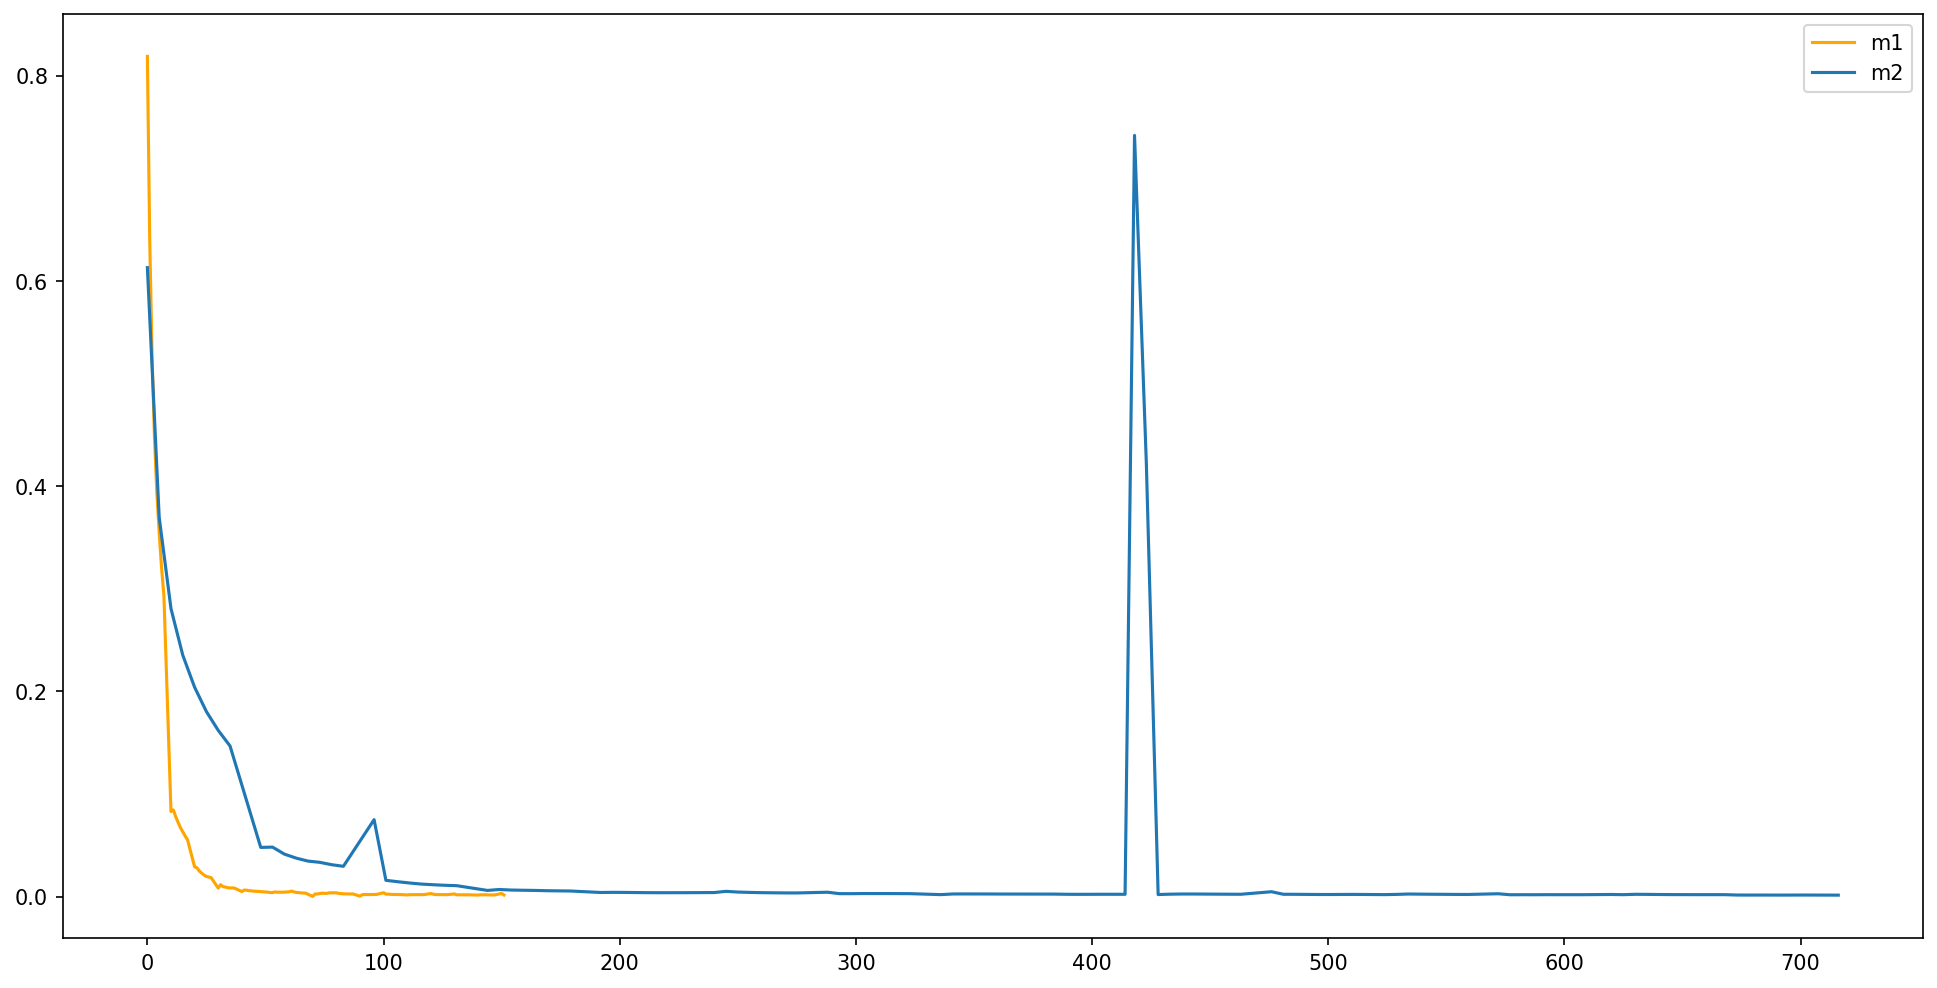

In [160]:
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
df_train['bce_loss'].plot(label='m1', color='orange')
df_train1['bce_loss'][:len(df_train)].plot(label='m2')
# ford['Open'].plot(label='Ford')
  
# adding title to the plot
# plt.title('Open Price Plot')
  
# # adding Label to the x-axis
# plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

['mobileone_s4_Unet_clip-rotated-32x-customLR1', 'efficientnet-b4_Unet_clip-rotated-32x-customLR1']
['bce_with_logits_loss', 'iou_score', 'fscore']


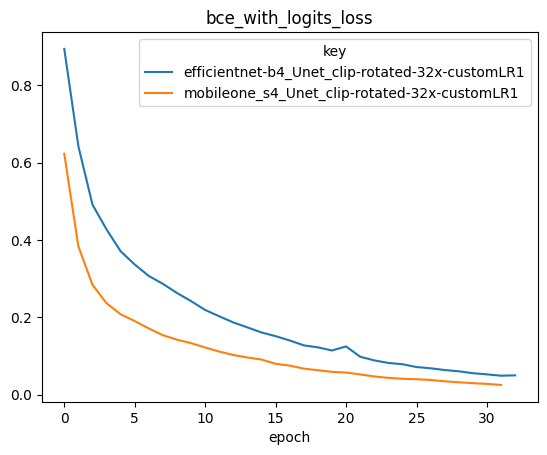

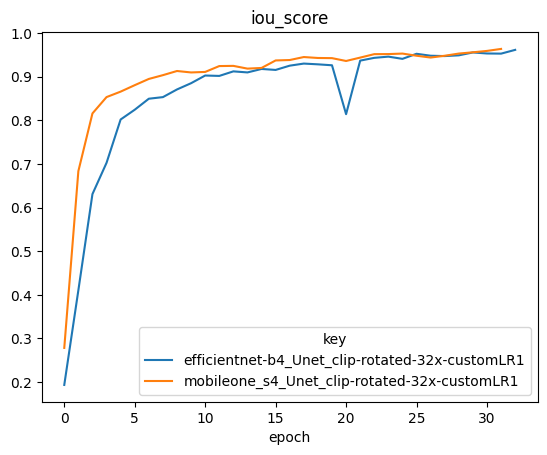

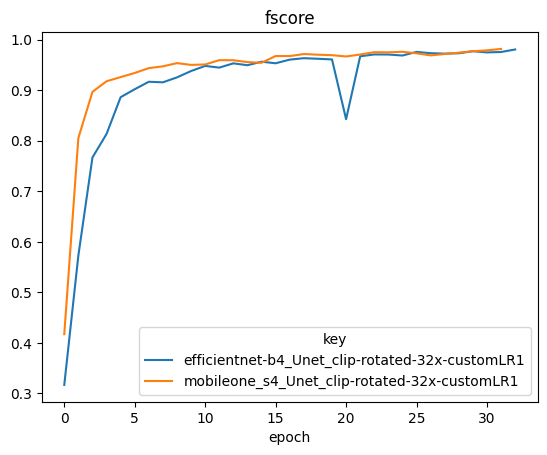

In [66]:
# log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json"
#     ]

log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315_1.json",
            ### 
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315_1.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_133848.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_162347.json",
#         "D:\\project\\TrueHealth\\git\\segmentation_models.pytorch\\output\\logs\\resnext101_32x4d\\resnext101_32x4d_logs_0321_092203.json",

            
    
            ## lung 
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_Unet\efficientnet-b4_Unet_logs_0322_145204.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_MANet\efficientnet-b4_logs_0321_142242.json",
# #         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\mobileone_s4_Unet\mobileone_s4_logs_0315.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\mobileone_s4_Unet\mobileone_s4_Unet_logs_0322_183333.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\\tu-regnety_040_MANet\\tu-regnety_040_MANet_logs_0321_173313.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\\tu-regnety_040_MANet\\tu-regnety_040_MANet_logs_0323_183024.json"
            "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\mobileone_s4_Unet\clip-rotated-32x-customLR1\mobileone_s4_Unet_clip-rotated-32x-customLR1_logs_0413_112951.json",
            "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_Unet\clip-rotated-32x-customLR1\efficientnet-b4_Unet_clip-rotated-32x-customLR1_logs_0413_125610.json",
    
    ## zhi qi guan
#         "D:\share\efficientnet-b4_logs_0317_095242.json",
#             "D:\share\efficientnet-b4_Unet_clip_rotated_logs_0329_100345.json"
#             "D:\share\efficientnet-b4_MANet_logs_0321_151721.json",
#         "D:\share\efficientnet-b4_Unet_logs_0324_182306.json",
    
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\\tu-regnety_040_MANet_rotated\\tu-regnety_040_MANet_rotated_logs_0329_182350.json"
    
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_Unet_normal-rotated\efficientnet-b4_Unet_normal-rotated_logs_0404_183653.json"
#             "D:\share\stdc\stdc2_Unet_clip-rotated_logs_0331_163802.json",
#             "D:\share\stdc\stdc2_MANet_clip-rotated_logs_0407_170724.json",
    
#     "D:\share\stdc\stdc2_Unet_clip_rotated_logs_0407_111627.json", ## 小球
    
#     "D:\share\stdc\stdc2_Unet_clip-rotated_logs_0410_181552.json", ## ds8x zhiqiguan
    
#     "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\stdc2_Unet\clip-rotated-32x-customLR1\stdc2_Unet_clip-rotated-32x-customLR1_logs_0412_183127.json",
#     "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\stdc2_Unet_clip-rotated\stdc2_Unet_clip-rotated_logs_0406_183556.json",

                ## 3类别的，下边的两个是一整个，由于电脑反应慢，中间重启过
#             "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\stdc2_Unet\clip-rotated-32x-customLR1\stdc2_Unet_clip-rotated-32x-customLR1_logs_0413_090007.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\stdc2_Unet\clip-rotated-32x-customLR1\stdc2_Unet_clip-rotated-32x-customLR1_logs_0413_101447.json",
    ## zhiqiguan
#     "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\stdc2_Unet\clip-rotated-32x-customLR1\stdc2_Unet_clip-rotated-32x-customLR1_logs_0412_183127.json",


]
    
df_list = []
model_names = []
for idx, file in enumerate(log_files):
#     name = file.split("\\")[-2]
#      model_names.append("{}_{}" .format(name, idx))
    name = "_".join(os.path.splitext(file.split("\\")[-1])[0].split("_")[:-3])
#     if name in model_names:
    model_names.append(name)
    info = parse_jsonline_file(file)
    df = pd.DataFrame.from_records(info)
    df_train = df[df["status"] == "train"]
    df_list.append(df_train)
print(model_names)

df_epoch_list = []
ex_keys = []
# for idx, df in enumerate(df_list):
#     df_dst = mean_of_epoch(df)
#     key = 'trail{}'. format(idx)
#     df_dst.loc[:, "key"] = key
#     ex_keys.append(key)
#     df_epoch_list.append(df_dst)

# DF = pd.concat(df_epoch_list, keys=ex_keys)

for model_name, df in zip(model_names, df_list):
    df_dst = mean_of_epoch(df)
    key = model_name
    df_dst.loc[:, "key"] = key
    ex_keys.append(key)
    df_epoch_list.append(df_dst)
    
DF = pd.concat(df_epoch_list, keys=ex_keys)
DFGroup = DF.groupby(['epoch','key'])


cols = DFGroup.sum().unstack('key').columns
# for metric in ["bce_loss", "fscore", "iou_score"]: #, "fscore", "recall", "precision", "accuracy"]: bce_with_logits_loss
# for metric in ["bce_with_logits_loss", "fscore", "iou_score"]:
# print(cols)
n_files = len(log_files)
# print((cols[2*n_files:5*n_files]))
# print("----")
# print(set((cols[2*n_files:5*n_files])))
mts = []
for metric in cols[2*n_files:5*n_files]:
    metric = metric[0]
    if metric in mts:
        continue
    mts.append(metric)
    
    DFGPlot = DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)
print(mts)
    
# ddff = DFGroup.sum().unstack('key')
# # ddff = ddff.drop("total_step", axis=1)
# ddff = ddff.drop("step", axis=1)
# ddff.plot(kind="line")



In [18]:
DFGroup.sum().unstack('key').columns

MultiIndex([(    'status', 'clip-rotated-32x-customLR1_0'),
            (      'step', 'clip-rotated-32x-customLR1_0'),
            ('focal_loss', 'clip-rotated-32x-customLR1_0'),
            ( 'iou_score', 'clip-rotated-32x-customLR1_0'),
            (    'fscore', 'clip-rotated-32x-customLR1_0'),
            ( 'precision', 'clip-rotated-32x-customLR1_0'),
            (    'recall', 'clip-rotated-32x-customLR1_0'),
            (  'accuracy', 'clip-rotated-32x-customLR1_0')],
           names=[None, 'key'])

In [37]:
DF

status  epoch   step  bce_loss  iou_score  \
mobileone_s4_Unet_0          0      NaN    0.0  175.0  0.506620   0.661761   
                             1      NaN    1.0  175.0  0.095208   0.930273   
                             2      NaN    2.0  175.0  0.034919   0.950622   
                             3      NaN    3.0  175.0  0.014630   0.966189   
                             4      NaN    4.0  175.0  0.011694   0.962351   
...                                 ...    ...    ...       ...        ...   
clip-rotated-32x-customLR1_1 19     NaN   19.0  175.0       NaN   0.942589   
                             20     NaN   20.0  175.0       NaN   0.936076   
                             21     NaN   21.0  175.0       NaN   0.943818   
                             22     NaN   22.0  175.0       NaN   0.951739   
                             23     NaN   23.0    0.0       NaN   0.951308   

                                   fscore  precision    recall  accuracy  \
mobileone_s4_Unet_0          0   0.751291   0.719465  0.847676  0.911450   
                             1   0.962885   0.970715  0.958198  0.990725   
                             2   0.972060   0.979791  0.970364  0.993144   
                             3   0.982732   0.985793  0.979971  0.994782   
                             4   0.979545   0.987437  0.974540  0.994104   
...                                   ...        ...       ...       ...   
clip-rotated-32x-customLR1_1 19  0.969114   0.977237  0.964479  0.991953   
                             20  0.966546   0.966359  0.968396  0.992609   
                             21  0.970443   0.973402  0.969486  0.993039   
                             22  0.975022   0.984336  0.966740  0.992939   
                             23  0.975047   0.994646  0.956205  0.990047   

                                                          key  \
mobileone_s4_Unet_0          0            mobileone_s4_Unet_0   
                             1            mobileone_s4_Unet_0   
                             2            mobileone_s4_Unet_0   
                             3            mobileone_s4_Unet_0   
                             4            mobileone_s4_Unet_0   
...                                                       ...   
clip-rotated-32x-customLR1_1 19  clip-rotated-32x-customLR1_1   
                             20  clip-rotated-32x-customLR1_1   
                             21  clip-rotated-32x-customLR1_1   
                             22  clip-rotated-32x-customLR1_1   
                             23  clip-rotated-32x-customLR1_1   

                                 bce_with_logits_loss  
mobileone_s4_Unet_0          0                    NaN  
                             1                    NaN  
                             2                    NaN  
                             3                    NaN  
                             4                    NaN  
...                                               ...  
clip-rotated-32x-customLR1_1 19              0.059005  
                             20              0.057243  
                             21              0.052430  
                             22              0.047163  
                             23              0.041579  

[93 rows x 11 columns]

C:\Users\dulic\AppData\Local\Temp\ipykernel_26812\3059719779.py:79: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ddff = DFGroup.sum().unstack('key')


<Axes: xlabel='total_step'>

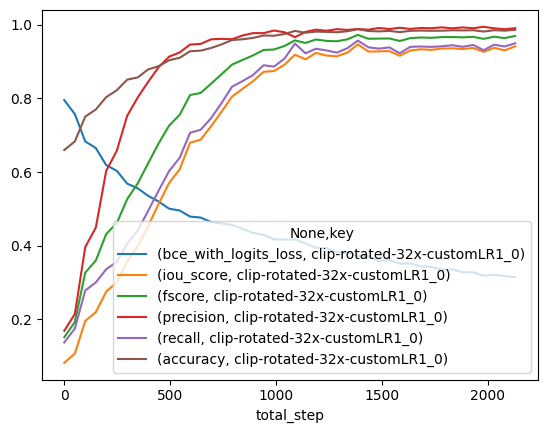

In [25]:
log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json", ##eg
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315_1.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_133848.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_162347.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_MANet\efficientnet-b4_logs_0321_142242.json"
           
#     "D:\share\efficientnet-b4_logs_0317_095242.json",
#     "D:\share\efficientnet-b4_Unet_clip_rotated_logs_0329_100345.json"
#             "D:\share\efficientnet-b4_MANet_logs_0321_151721.json",
#          "D:\share\efficientnet-b4_Unet_logs_0324_182306.json",
    
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_Unet\efficientnet-b4_Unet_logs_0322_145204.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_MANet\efficientnet-b4_logs_0321_142242.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\\tu-regnety_040_MANet\\tu-regnety_040_MANet_logs_0321_173313.json",
# #         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\mobileone_s4_Unet\mobileone_s4_logs_0315.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\mobileone_s4_Unet\mobileone_s4_Unet_logs_0322_183333.json"
    
#     "D:\share\stdc\stdc2_Unet_clip_rotated_logs_0407_111627.json", ## 小球
    
#     "D:\share\stdc\stdc2_Unet_clip-rotated_logs_0410_181552.json", ## ds8x zhiqiguan
    "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\stdc2_Unet\clip-rotated-32x-customLR1\stdc2_Unet_clip-rotated-32x-customLR1_logs_0413_090007.json",
        
    ]
# steps_per_epoch = 396 ##根据数据及batch-size计算出来的
# steps_per_epoch = 20904
# steps_per_epoch = 6852
steps_per_epoch = 99
df_list = []
model_names = []
## differnet experiment
for idx, file in enumerate(log_files):
    name = file.split("\\")[-2]
    model_names.append("{}_{}" .format(name, idx))
    info = parse_jsonline_file(file)
    df = pd.DataFrame.from_records(info)
    df_train = df[df["status"] == "train"]
    df_list.append(df_train)

# ## train and valid####
# info = parse_jsonline_file(file)
# df = pd.DataFrame.from_records(info)
# df_train = df[df["status"] == "train"]
# df_list.append(df_train)
# df_valid = df[df["status"] == "valid"]
# df_list.append(df_valid)


df_epoch_list = []
ex_keys = []
for model_name, df_tmp in zip(model_names, df_list):
    df_tmp = df_tmp[df_tmp["step"] % 50 == 0]
    df_tmp = df_tmp.reset_index()
    df_tmp = df_tmp.drop("index", axis=1)
    df_tmp["total_step"] = df_tmp["step"]
    df_tmp["total_step"] = df_tmp.apply(
        lambda x: myfunction(x["epoch"]*steps_per_epoch,  x['step']), 
        axis=1
    )
    df_dst = df_tmp
    # df_dst = mean_of_epoch(df)
#     key = 'trail{}'. format(idx)
    key = model_name
    df_dst.loc[:, "key"] = key
    ex_keys.append(key)
    df_epoch_list.append(df_dst)

DF = pd.concat(df_epoch_list, keys=ex_keys)
# DFGroup = DF.groupby(['total_step','key'])
DFGroup = DF.groupby(['total_step', "key"])
# DF1 = DF.drop(["epoch", "step", "status"], axis=1)
# DFGroup = DF1.groupby(['total_step','key'])

# for metric in ["bce_loss", "fscore", "recall"]: #, "fscore", "recall", "precision", "accuracy"]:
#     DFGPlot = DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)

# DFGPlot = DFGroup.sum().unstack('key').plot(kind='line')
# ddff = DFGroup.sum().unstack('key')
ddff = DFGroup.sum().unstack('key')
ddff = ddff.drop("epoch", axis=1)
ddff = ddff.drop("step", axis=1)
ddff.plot(kind="line")

In [427]:
dfp = df_list[0]
dfp = dfp[dfp["step"] % 50 == 0]
df_epoch_list[0]
list(DF["total_step"])
DF

status  epoch  step  bce_loss  iou_score    fscore  \
mobileone_s4_Unet 0    train      0     0  0.785930   0.070443  0.131615   
                  1    train      0    50  0.422097   0.597123  0.726770   
                  2    train      0   100  0.311063   0.741970  0.832855   
                  3    train      0   150  0.255846   0.803382  0.875683   
                  4    train      0   200  0.223049   0.832281  0.895839   
...                      ...    ...   ...       ...        ...       ...   
                  275  train     33   150  0.000801   0.996865  0.998430   
                  276  train     33   200  0.000811   0.996866  0.998430   
                  277  train     33   250  0.000814   0.996825  0.998409   
                  278  train     33   300  0.000811   0.996857  0.998426   
                  279  train     33   350  0.000816   0.996894  0.998444   

                       precision    recall  accuracy  total_step  \
mobileone_s4_Unet 0     0.084186  0.301435  0.726953           0   
                  1     0.650721  0.858037  0.921692          50   
                  2     0.797532  0.897563  0.953216         100   
                  3     0.854699  0.916787  0.965632         150   
                  4     0.880259  0.927640  0.972003         200   
...                          ...       ...       ...         ...   
                  275   0.998966  0.997895  0.999654       13218   
                  276   0.998964  0.997897  0.999650       13268   
                  277   0.998941  0.997879  0.999649       13318   
                  278   0.998963  0.997889  0.999650       13368   
                  279   0.998974  0.997915  0.999648       13418   

                                     key  
mobileone_s4_Unet 0    mobileone_s4_Unet  
                  1    mobileone_s4_Unet  
                  2    mobileone_s4_Unet  
                  3    mobileone_s4_Unet  
                  4    mobileone_s4_Unet  
...                                  ...  
                  275  mobileone_s4_Unet  
                  276  mobileone_s4_Unet  
                  277  mobileone_s4_Unet  
                  278  mobileone_s4_Unet  
                  279  mobileone_s4_Unet  

[280 rows x 11 columns]

In [420]:
DFGroup.sum().unstack('key')


C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\3967880460.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFGroup.sum().unstack('key')


,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy
key,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet,mobileone_s4_Unet
total_step,,,,,,,,
0,0,0,1.321133,0.126654,0.238053,0.260563,0.377652,1.629902
50,0,100,0.696072,1.249538,1.479344,1.481781,1.565137,1.875970
100,0,200,0.517568,1.518454,1.682427,1.692606,1.720095,1.924815
150,0,300,0.427857,1.629109,1.761751,1.775218,1.782297,1.943669
200,0,400,0.372850,1.682644,1.800242,1.812413,1.815722,1.953409
...,...,...,...,...,...,...,...,...
13218,33,150,0.000801,0.996865,0.998430,0.998966,0.997895,0.999654
13268,33,200,0.000811,0.996866,0.998430,0.998964,0.997897,0.999650


In [269]:
DF1["total_step"]

trail0  0          0
        1         50
        2        100
        3        150
        4        200
               ...  
trail1  227     9950
        228    10000
        229    10050
        230    10100
        231    10150
Name: total_step, Length: 354, dtype: int64

In [287]:
DFGroup.sum().unstack('key')

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\2540715877.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFGroup.sum().unstack('key')


,epoch,step,bce_loss,iou_score,fscore,precision,recall,accuracy
key,trail0,trail0,trail0,trail0,trail0,trail0,trail0,trail0
total_step,,,,,,,,
0,0,0,0.818780,0.184299,0.311237,0.210795,0.594523,0.874412
50,0,50,0.638831,0.203522,0.313945,0.251441,0.558574,0.896727
100,0,100,0.525898,0.295436,0.403951,0.370891,0.589172,0.930972
150,0,150,0.448034,0.349871,0.451392,0.439887,0.596756,0.948383
200,0,200,0.394359,0.398124,0.494766,0.493809,0.614252,0.957650
...,...,...,...,...,...,...,...,...
5794,14,250,0.001775,0.891282,0.935232,0.979283,0.904564,0.998943
5844,14,300,0.001740,0.897082,0.938926,0.980187,0.910047,0.998974


In [265]:
DFGroup.sum().unstack('key').sort_values(by="total_step")

C:\Users\dulic\AppData\Local\Temp\ipykernel_15728\1003715224.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFGroup.sum().unstack('key').sort_values(by="total_step")


epoch          step         bce_loss           iou_score  \
key        trail0 trail1 trail0 trail1    trail0    trail1    trail0   
total_step                                                             
0             0.0    0.0    0.0    0.0  0.818780  0.969886  0.184299   
50            0.0    0.0   50.0   50.0  0.638831  0.669675  0.203522   
100           0.0    0.0  100.0  100.0  0.525898  0.549575  0.295436   
150           0.0    0.0  150.0  150.0  0.448034  0.486414  0.349871   
200           0.0    0.0  200.0  200.0  0.394359  0.439603  0.398124   
...           ...    ...    ...    ...       ...       ...       ...   
9950          NaN   28.0    NaN  150.0       NaN  0.001314       NaN   
10000         NaN   28.0    NaN  200.0       NaN  0.001313       NaN   
10050         NaN   28.0    NaN  250.0       NaN  0.001304       NaN   
10100         NaN   28.0    NaN  300.0       NaN  0.001303       NaN   
10150         NaN   28.0    NaN  350.0       NaN  0.001284       NaN   

                        fscore           precision              recall  \
key           trail1    trail0    trail1    trail0    trail1    trail0   
total_step                                                               
0           0.133152  0.311237  0.235011  0.210795  0.150294  0.594523   
50          0.402960  0.313945  0.555307  0.251441  0.454619  0.558574   
100         0.586868  0.403951  0.708979  0.370891  0.650747  0.589172   
150         0.679038  0.451392  0.778321  0.439887  0.743002  0.596756   
200         0.739666  0.494766  0.823411  0.493809  0.798500  0.614252   
...              ...       ...       ...       ...       ...       ...   
9950        0.994081       NaN  0.996997       NaN  0.997667       NaN   
10000       0.994389       NaN  0.997160       NaN  0.997875       NaN   
10050       0.994477       NaN  0.997209       NaN  0.997973       NaN   
10100       0.994511       NaN  0.997230       NaN  0.998002       NaN   
10150       0.994626       NaN  0.997290       NaN  0.998070       NaN   

                      accuracy            
key           trail1    trail0    trail1  
total_step                                
0           0.538614  0.874412  0.523947  
50          0.779582  0.896727  0.836485  
100         0.841322  0.930972  0.902409  
150         0.870492  0.948383  0.929854  
200         0.891408  0.957650  0.944757  
...              ...       ...       ...  
9950        0.996350       NaN  0.999439  
10000       0.996464       NaN  0.999436  
10050       0.996461       NaN  0.999440  
10100       0.996471       NaN  0.999441  
10150       0.996522       NaN  0.999449  

[204 rows x 16 columns]

In [ ]:
## train and valid

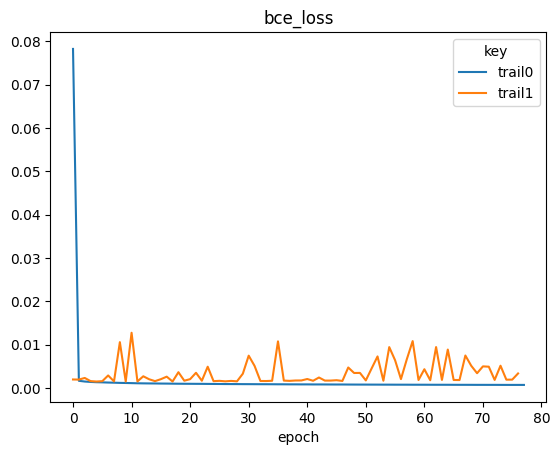

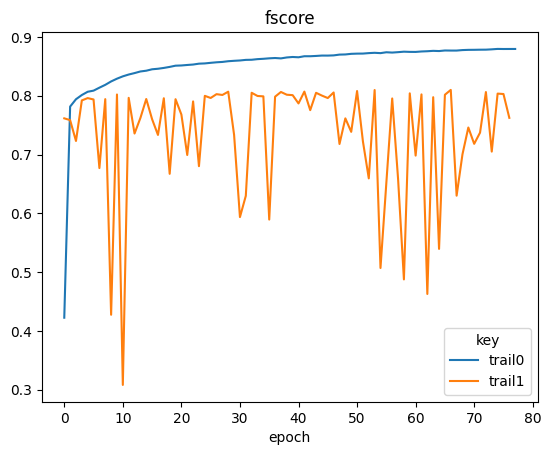

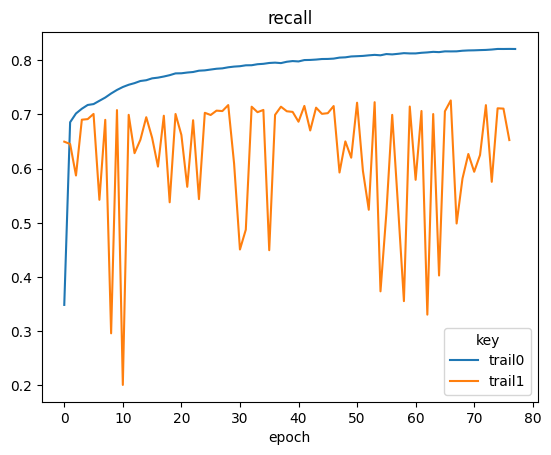

In [153]:
# log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json"
#     ]

log_files = [
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0316_174217.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0315_1.json",
#         "D:\share\efficientnet-b4_logs_0317_095242.json", ##支气管 linux
#         "D:\share\efficientnet-b4_MANet_logs_0321_151721.json",
#         "D:\share\efficientnet-b4_Unet_logs_0324_182306.json",
#          "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4\efficientnet-b4_logs_0320_162347.json",
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_MANet\efficientnet-b4_logs_0321_142242.json",
    
#         "D:\project\TrueHealth\git\segmentation_models.pytorch\output\logs\efficientnet-b4_Unet\efficientnet-b4_Unet_logs_0322_145204.json"
   
    
        "D:\share\stdc\stdc2_Unet_clip-rotated_logs_0331_163802.json"
#     
#         "D:\share\efficientnet-b4_Unet_clip_rotated_logs_0329_100345.json"
    ]
    
df_list = []
# for file in log_files:
#     info = parse_jsonline_file(file)
#     df = pd.DataFrame.from_records(info)
#     df_train = df[df["status"] == "train"]
#     df_list.append(df_train)

info = parse_jsonline_file(log_files[0])
df = pd.DataFrame.from_records(info)
df_train = df[df["status"] == "train"]
df_list.append(df_train)
df_valid = df[df["status"] == "valid"]
df_list.append(df_valid)

df_epoch_list = []
ex_keys = []
for idx, df in enumerate(df_list):
    df_dst = mean_of_epoch(df)
    key = 'trail{}'. format(idx)
    df_dst.loc[:, "key"] = key
    ex_keys.append(key)
    df_epoch_list.append(df_dst)

DF = pd.concat(df_epoch_list, keys=ex_keys)
DFGroup = DF.groupby(['epoch','key'])

for metric in ["bce_loss", "fscore", "recall"]: #, "fscore", "recall", "precision", "accuracy"]:
    DFGPlot = DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)

In [154]:
DFGroup.sum().unstack('key')

status           step         bce_loss           iou_score            \
key   trail0 trail1  trail0 trail1    trail0    trail1    trail0    trail1   
epoch                                                                        
0.0      0.0    0.0  2600.0  700.0  0.078236  0.001962  0.321449  0.620582   
1.0      0.0    0.0  2600.0  700.0  0.001659  0.001938  0.642846  0.616462   
2.0      0.0    0.0  2600.0  700.0  0.001490  0.002315  0.659801  0.574172   
3.0      0.0    0.0  2600.0  700.0  0.001398  0.001583  0.669601  0.661466   
4.0      0.0    0.0  2600.0  700.0  0.001334  0.001490  0.677233  0.665544   
...      ...    ...     ...    ...       ...       ...       ...       ...   
73.0     0.0    0.0  2600.0  700.0  0.000714  0.005139  0.784454  0.553740   
74.0     0.0    0.0  2600.0  700.0  0.000711  0.001920  0.785579  0.675941   
75.0     0.0    0.0  2600.0  700.0  0.000710  0.001926  0.785345  0.675202   
76.0     0.0    0.0  2600.0  700.0  0.000710  0.003351  0.785425  0.623223   
77.0     0.0    NaN  1150.0    NaN  0.000707       NaN  0.785498       NaN   

         fscore           precision              recall            accuracy  \
key      trail0    trail1    trail0    trail1    trail0    trail1    trail0   
epoch                                                                         
0.0    0.422478  0.761516  0.601510  0.933602  0.348526  0.649673  0.996815   
1.0    0.781514  0.758471  0.912284  0.934663  0.685482  0.645310  0.999333   
2.0    0.794011  0.723016  0.917543  0.965785  0.701658  0.587287  0.999363   
3.0    0.801193  0.792014  0.920948  0.943199  0.710408  0.690196  0.999375   
4.0    0.806718  0.795939  0.923879  0.949159  0.717342  0.691266  0.999387   
...         ...       ...       ...       ...       ...       ...       ...   
73.0   0.878862  0.704959  0.947796  0.942153  0.819626  0.575600  0.999528   
74.0   0.879572  0.803574  0.948030  0.934207  0.820682  0.711203  0.999530   
75.0   0.879431  0.802888  0.947770  0.934323  0.820627  0.710638  0.999527   
76.0   0.879474  0.762337  0.947719  0.936902  0.820746  0.652624  0.999526   
77.0   0.879499       NaN  0.947989       NaN  0.820630       NaN  0.999527   

                 
key      trail1  
epoch            
0.0    0.999265  
1.0    0.999257  
2.0    0.999220  
3.0    0.999326  
4.0    0.999334  
...         ...  
73.0   0.999169  
74.0   0.999342  
75.0   0.999341  
76.0   0.999276  
77.0        NaN  

[78 rows x 16 columns]

In [215]:
# log_file = "D:\share\stdc\BiSeNet-2023-03-31-11-31-50.log"
stdc_log_files = [

    "D:\share\stdc\BiSeNet-2023-03-31-11-31-50.log",
    "D:\share\stdc\BiSeNet-2023-04-04-13-53-34.log",
]

def parse_log(file):
    with open(log_file) as f:
        data = [x.strip() for x in f.readlines()]
    
    alls = []
    for tmp in data:
        tmp = tmp[len("INFO train_ct.py(442): "): ]
        if "boundery_bce_loss" not in tmp :
            continue
        splits = tmp.split(",")
        logs = {}
        for s in splits[:-3]:
            bb = s.split(":")
            key = bb[0]
            value = float(bb[1].split("/")[0])
            logs.update({key: value})
        alls.append(logs)
    
    return alls

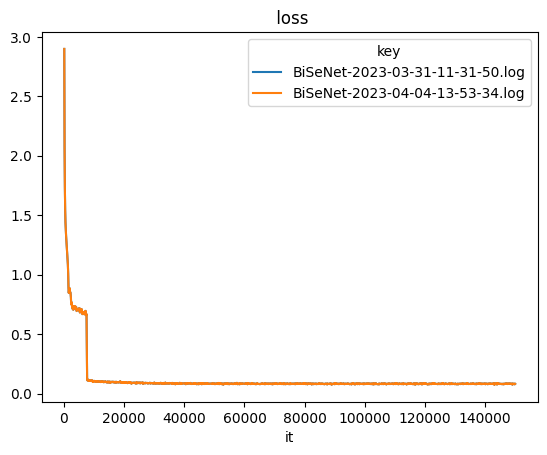

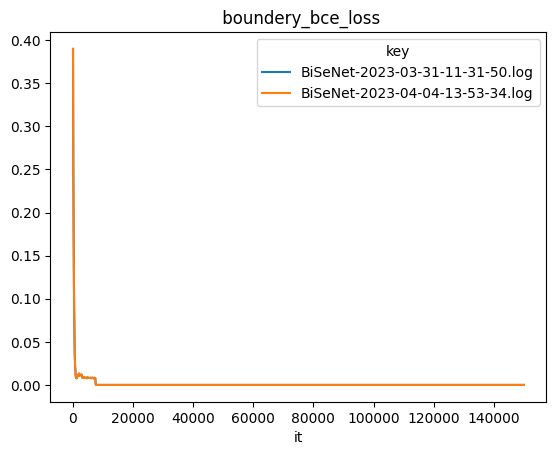

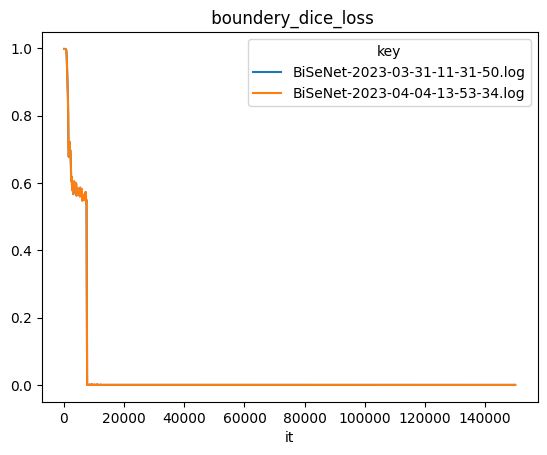

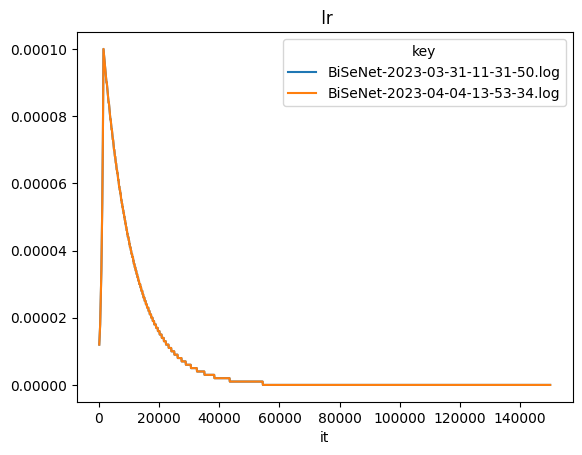

In [216]:
import json

stdc_list = []
model_names = []
for log in stdc_log_files:
    name = log.split("\\")[-1]
    model_names.append(name)
    
    data = parse_log(log)
    tmp = pd.DataFrame(data)
    stdc_list.append(tmp)
    
stdc_df_list = []
ex_keys = []
for model_name, df_tmp in zip(model_names, stdc_list):
    df_tmp.loc[:, "key"] = model_name
    stdc_df_list.append(df_tmp)
    ex_keys.append(model_name)

stdc_DF = pd.concat(stdc_df_list, keys=ex_keys)
stdc_DFGroup = stdc_DF.groupby(["it", "key"])

for metric in [" loss", " boundery_bce_loss", " boundery_dice_loss"]:
    stdc_DFGPlot = stdc_DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)

for metric in [" lr"]:
     stdc_DFGPlot = stdc_DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)
        
# stdc_ddff = stdc_DFGroup.sum().unstack('key')
# stdc_ddff.plot(kind="line")

In [213]:
df_tmp

,it,lr,loss,boundery_bce_loss,boundery_dice_loss,key
0,100.0,0.000012,2.8985,0.3898,0.9985,BiSeNet-2023-04-04-13-53-34.log
1,200.0,0.000014,2.0670,0.2521,0.9985,BiSeNet-2023-04-04-13-53-34.log
2,300.0,0.000016,1.7389,0.1748,0.9985,BiSeNet-2023-04-04-13-53-34.log
3,400.0,0.000018,1.5417,0.1188,0.9985,BiSeNet-2023-04-04-13-53-34.log
4,500.0,0.000022,1.4389,0.0796,0.9983,BiSeNet-2023-04-04-13-53-34.log
...,...,...,...,...,...,...
1495,149600.0,0.000000,0.0844,0.0000,0.0000,BiSeNet-2023-04-04-13-53-34.log
1496,149700.0,0.000000,0.0791,0.0000,0.0000,BiSeNet-2023-04-04-13-53-34.log
1497,149800.0,0.000000,0.0783,0.0000,0.0000,BiSeNet-2023-04-04-13-53-34.log
1498,149900.0,0.000000,0.0785,0.0000,0.0000,BiSeNet-2023-04-04-13-53-34.log


<Axes: xlabel='it'>

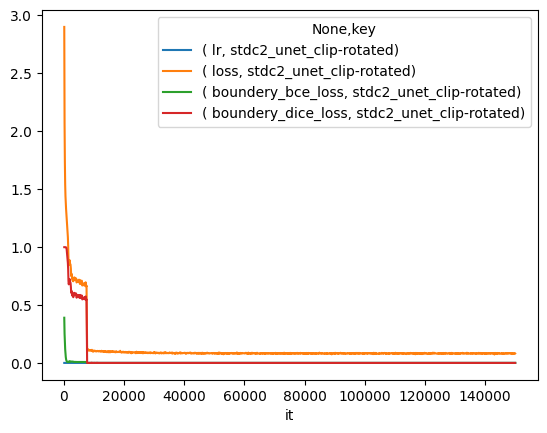

In [206]:
ex_keys = ["stdc2_unet_clip-rotated"]
stdc_df = pd.DataFrame(alls)


stdc_df_list = []
for kk in ex_keys:
    stdc_df.loc[:, "key"] = kk
    stdc_df_list.append(stdc_df)

stdc_DF = pd.concat(stdc_df_list, keys=ex_keys)

stdc_DFGroup = stdc_DF.groupby(["it", "key"])

for metric in [" loss", " boundery_bce_loss", " boundery_dice_loss"]:
    stdc_DFGPlot = stdc_DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)

for metric in [" lr"]:
     stdc_DFGPlot = stdc_DFGroup.sum().unstack('key').plot(kind='line', y=metric, title =metric)
        
# stdc_ddff = stdc_DFGroup.sum().unstack('key')
# stdc_ddff.plot(kind="line")

In [193]:
stdc_df

,it,lr,loss,boundery_bce_loss,boundery_dice_loss,key
0,50.0,0.000014,3.9001,0.7259,0.9985,stdc2_unet_clip-rotated
1,100.0,0.000020,3.0747,0.5849,0.9986,stdc2_unet_clip-rotated
2,150.0,0.000028,2.5832,0.4445,0.9986,stdc2_unet_clip-rotated
3,200.0,0.000040,2.2720,0.3197,0.9987,stdc2_unet_clip-rotated
4,250.0,0.000056,1.8808,0.2185,0.9987,stdc2_unet_clip-rotated
...,...,...,...,...,...,...
387,19400.0,0.009698,0.5693,0.0094,0.4638,stdc2_unet_clip-rotated
388,19450.0,0.009697,0.5882,0.0092,0.4809,stdc2_unet_clip-rotated
389,19500.0,0.009696,0.5725,0.0092,0.4655,stdc2_unet_clip-rotated
390,19550.0,0.009695,0.5990,0.0101,0.4870,stdc2_unet_clip-rotated


                     key                    
 lr                  stdc2_unet_clip-rotated    object
 loss                stdc2_unet_clip-rotated    object
 boundery_bce_loss   stdc2_unet_clip-rotated    object
 boundery_dice_loss  stdc2_unet_clip-rotated    object
dtype: object

In [173]:
DF

it         lr     loss  boundery_bce_loss  \
stdc2_unet_clip-rotated 0        50   0.000014   3.9001             0.7259   
                        1       100   0.000020   3.0747             0.5849   
                        2       150   0.000028   2.5832             0.4445   
                        3       200   0.000040   2.2720             0.3197   
                        4       250   0.000056   1.8808             0.2185   
...                             ...        ...      ...                ...   
                        387   19400   0.009698   0.5693             0.0094   
                        388   19450   0.009697   0.5882             0.0092   
                        389   19500   0.009696   0.5725             0.0092   
                        390   19550   0.009695   0.5990             0.0101   
                        391   19600   0.009695   0.6032             0.0097   

                             boundery_dice_loss                      key  
stdc2_unet_clip-rotated 0                0.9985  stdc2_unet_clip-rotated  
                        1                0.9986  stdc2_unet_clip-rotated  
                        2                0.9986  stdc2_unet_clip-rotated  
                        3                0.9987  stdc2_unet_clip-rotated  
                        4                0.9987  stdc2_unet_clip-rotated  
...                                         ...                      ...  
                        387              0.4638  stdc2_unet_clip-rotated  
                        388              0.4809  stdc2_unet_clip-rotated  
                        389              0.4655  stdc2_unet_clip-rotated  
                        390              0.4870  stdc2_unet_clip-rotated  
                        391              0.4910  stdc2_unet_clip-rotated  

[392 rows x 6 columns]